# (4주차) 3월28일 -- draft

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### imports 

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
import tensorflow.experimental.numpy as tnp 

In [3]:
tnp.experimental_enable_numpy_behavior() 

### 최적화문제 

`-` $loss=(\frac{1}{2}\beta-1)^2$를 최소하는 $\beta$를 컴퓨터를 활용하여 구하는 문제를 생각해보자. (우리는 답을 알고 있긴 함 $\beta=2$)

### 방법1: grid search

#### 그리드서치의 문제점 

`-` 비판1: [-10,10]이외에 해가 존재하면? 
- 이 예제의 경우는 운좋게 [-10,10]에서 해가 존재했음
- 하지만 임의의 고정된 $x,y$에 대하여 $loss(\beta)=(x\beta-y)^2$ 의 형태의 해가 항상 [-10,10]에서 존재한다는 보장은 없음
- 해결책: 더 넓게 많은 범위를 탐색하자? 

`-` 비판2: 효율적이지 않음
- 알고리즘을 요약하면 결국 -10부터 10까지 작은 간격으로 조금씩 이동하며 loss를 조사하는 것이 grid search의 아이디어 
- $\to$ 생각해보니까 $\beta=2$인 순간 $loss=(\frac{1}{2}\beta-1)^2=0$이 되어서 이것보다 작은 최소값은 존재하지 않는다(제곱은 항상 양수이어야 하므로)
- $\to$ 따라서 $\beta=2$ 이후로는 탐색할 필요가 없다 

### 방법2: gradient descent

#### 알고리즘

(1) 임의의 초기값을 선정하고 loss를 계산한다. 
 - $\beta=-5 \to loss(-5)=(-5/2-1)^2=$

(2) 임의의 초기값에서 좌우로 약간씩 이동해보고 loss를 계산한다.
 - 왼쪽으로 이동: $\beta=-5.01,\quad loss(5.01)=$
 - 오른쪽으로 이동: $\beta=-4.99, \quad loss(-4.99)=$ 

(3) (2)의 결과를 보고 어느쪽으로 이동하는것이 유리한지 따져보고 `유리한 방향으로` 이동한다. 
- $\beta=-4.99$ 로 이동 


(4) (2)-(3) 의 과정을 반복한다. **왼쪽/오른쪽 모두 가봐도 유리한 지점이 없다면 알고리즘을 멈춘다.**

#### 잠깐 알고리즘 감상 

`-` 알고리즘이 멈추는 지점은 $\beta=2$이다. 왜냐하면 이경우 왼쪽으로 가도, 오른쪽으로 가도 현재 손실함수값보다 크기 때문. 

`-` 이 알고리즘은 $loss=(x\beta-y)^2$의 꼴에서 $[-10,10]$ 이외의 지점에 해가 존재하여도 적절하게 해를 찾을 것.

`-` 또한 비효율적으로 $\beta=2$ 이후에도 탐색을 반복하지 않는다. 

`-` 알고리즘해석 

#### 왼쪽/오른쪽중에 어디로 갈지 어떻게 판단하는 과정을 수식화?

`-` 미분계수의 의미

`-` 수식화 

$$\beta_{next} = \begin{cases} \beta_{old} - 0.01 & loss'(\beta_{old})>0 \\ \beta_{old} + 0.01 & loss'(\beta_{old})<0  \end{cases}$$

#### hoxy, 알고리즘을 좀 개선할수 있을까?

`-` 동일하게 0.01씩 이동하는게 맞을까? 

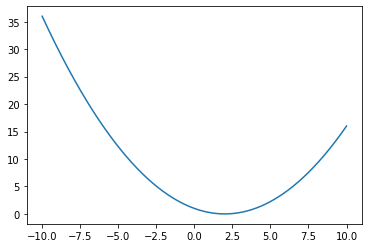

In [91]:
plt.plot(beta,loss)

`-` 위의 그림에서 $\beta=-10$ 일 경우의 접선의 기울기는 $-6$이고 $\beta=-4$ 일때 접선의 기울기는 $-3$이다. 

$\because loss = (0.5\beta-1)^2 \to loss' = 0.5\beta-1$

`-` 아이디어

`-` 아이디어를 수식화하자!

$$\beta_{next} \leftarrow \beta_{old} -\alpha \left[\frac{\partial}{\partial \beta} loss(\beta)\right]_{\beta=\beta_{old}}$$

- 아까 수식이랑 좀 다르다?
- $\alpha$의 가정 
- $\alpha$의 의미: 
- $\alpha$의 설정: 

(개선한 알고리즘을 이용한 풀이) 

**iter1:** beta=-10 출발

- 왜 tf.Variable의 메소드에 assign_add, assign_sub 정도만 있는지? 
- persistenct도 왜 디폴트가 False인지? 

**iter2**

**for문**

#### 학습률 

`-` 목표: 아래의 학습과정을 시각화해보자. 

##### **[시각화코드 예비학습]**

`-` 환경설정

In [4]:
plt.rcParams["animation.html"]="jshtml"

In [5]:
from matplotlib import animation 

`-` 도화지와 네모틀 생성 

`-` 도화지와 네모는 포함관계에 있음. 

`-` 그래서 도화지를 출력하면 네모틀도 알아서 출력됨 (네모틀이 없다면 도화지 출력시 아무것도 출력되지 않음) 

`-` 네모틀(ax)의 특수기능(=메소드)중에는 plot이 있음. 이것은 또 어떤 오브젝트를 생성함 

`-` pnts 오브젝트: x,y data를 변경해보자. 

`-` 에니매이션

예비학습끝 

`-` 다시 학습과정 시각화 문제로 돌아오자. 

`-` 만약에 beta_lst = [-10,-9,-8] 순으로 업데이트 되었다면 아래와 같이 시각화 가능 

`-` 학습과정을 beta_lst, loss_lst로 저장하자. 

`-` 최종결과 

`-` alpha를 조정한다!! 

`-` alpha를 더 크게하면? 

`-` alpha는 학습속도를 의미함. $\to$ 빨리배우는게 좋으니까 학습률이 크면 무조건 좋은거아닌가? $\to$ 아니에용

(예시1) 너무 큰 학습률의 비효율성 

(예시2) 너무 큰 학습률의 위험성

### 방법3: tf.keras.optimizers를 이용 

`-` 수식 $\beta_{next} \leftarrow \beta_{old} -\alpha \left[\frac{\partial}{\partial \beta} loss(\beta)\right]_{\beta=\beta_{old}}$ 을 모를때!

`-` 정확한 수식은 모르지만 이상한 초기 $\beta$를 점점 update해서 **그럴듯한** $\beta$로 만드는 느낌은 기억함. 
- 그럴듯한 = 최적의

`-` 그리고 그 방법이 미분을 이용한다는 것도 기억함! 

`-` 그럼 아래와 같은 기능을 수행하는 옵티마이저라는 물체(object)를 만들자! 
- 옵티마이저: ($\beta^{old}$, $\beta^{old}$에서의 미분값) $\to$ $\beta^{new}$

`-` 이 물체는 현재 아무것도 모르는 상태임 (뭘 최적화 하는지도 모름) 

`-` 옵티마이저에 전달할 값을 정리하자. 그러니까 (1) $\beta^{old}$와 (2) $\beta^{old}$의 미분값. 

`-` **iter1:** 옵티마이저에 값을 전달해보자. 전달방식이 좀 까다로운데 반드시 아래와 같은 형태로 전달해야한다. 
- (beta_old, beta)의 pair를 만든다. (순서가 바뀌면 안된다.) 
- pair들의 list를 전달한다. 

`-` **iter2**: 